In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import shutil
import os
from Bio import SeqIO
import re
import numpy as np
import io
import seaborn as sns

In [60]:
import Bio

In [61]:
from bioservices import *

In [62]:
from IPython import display

In [63]:
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from Bio.Graphics.ColorSpiral import ColorSpiral

from IPython.display import Image, HTML


In [117]:
##### 1.Parse the actionability file based on your search term 
#and create a new file that contains the following columns, MUTATION_REMARK,
#GENE, DISEASE, ACTIONABILITY_STATUS, DRUG_COMBINATION, DEVELOPMENT_STATUS, &
#PRIMARY_OUTCOME_MEASURE.1pt. Create a dataframe for your notebook.1pt.
with open("/Users/elenauttaro/Desktop/bioinformatics/finalproject/ActionabilityData.txt") as data:
    out = open('/Users/elenauttaro/Desktop/bioinformatics/finalproject/finalproj.txt', 'w')
    out.write('GENE' + '\t' + 'MUTATION_REMARK' + '\t' + 'DISEASE' + '\t' + 'ACTIONABILITY_STATUS' + '\t' + 'DEVELOPMENTAL_STATUS'+ '\t'+'DRUG_COMBINATION'+
              '\t' + 'PRIMARY_OUTCOME_MEASURE' +'\n')
    for line in data:
        if 'CD274' in line:
            line_list = line.split('\t')
            out.write(line_list[0] + '\t' + line_list[1] + '\t' + line_list[5] + '\t' + line_list[6] + '\t'+line_list[7]+'\t'+line_list[8]+'\t'+line_list[22]+'\n')      
    out.close()
print(data)
df = pd.read_csv('/Users/elenauttaro/Desktop/bioinformatics/finalproject/finalproj.txt', delimiter='\t')
df

<_io.TextIOWrapper name='/Users/elenauttaro/Desktop/bioinformatics/finalproject/ActionabilityData.txt' mode='r' encoding='UTF-8'>


,GENE,MUTATION_REMARK,DISEASE,ACTIONABILITY_STATUS,DEVELOPMENTAL_STATUS,DRUG_COMBINATION,PRIMARY_OUTCOME_MEASURE
0,BRCA1,(BRCA1_unspecified or BRCA2_unspecified) and C...,ovary / carcinoma / mixed carcinoma,3,Phase 1,Bevacizumab + Carboplatin + Paclitaxel + Velip...,Maximum tolerated dose/toxicity
1,BRCA1,(BRCA1_unspecified or BRCA2_unspecified) and C...,ovary / carcinoma / mixed carcinoma,3,Phase 2,Bevacizumab + Carboplatin + Paclitaxel + Velip...,Maximum tolerated dose/toxicity
2,BRCA1,(BRCA1_unspecified or BRCA2_unspecified) and C...,ovary / carcinoma / mixed carcinoma,3,Phase 2,Durvalumab + Olaparib + Tremelimumab,Progression free survival
3,EGFR,(EGFR_Exon19del or EGFR_L858R) and CD274_unspe...,lung / carcinoma / non small cell carcinoma,3,Phase 2,Alflutinib,Progression free survival
4,EGFR,(EGFR_Exon19del or EGFR_L858R) and CD274_unspe...,lung / carcinoma / non small cell carcinoma,3,Phase 2,Bevacizumab + Cisplatin + Pemetrexed + Tisleli...,Progression free survival
...,...,...,...,...,...,...,...
1049,KRAS,KRAS_unspecified and CD274_unspecified,salivary gland / carcinoma / NS,3,Phase 2,Pembrolizumab + Pemetrexed,Response rate
1050,KRAS,KRAS_unspecified and CD274_unspecified,soft tissue / leiomyosarcoma / NS,3,Phase 2,Gemcitabine + Pembrolizumab,Maximum tolerated dose/toxicity
1051,KRAS,KRAS_unspecified and CD274_unspecified,soft tissue / synovial sarcoma / NS,3,Phase 2,Interferon gamma-1b + Pembrolizumab,Overall Response Rate
1052,KRAS,KRAS_unspecified and CD274_unspecified,upper aerodigestive tract / carcinoma / NS,3,Phase 3,Nivolumab,Overall survival


<AxesSubplot:xlabel='GENE', ylabel='ACTIONABILITY_STATUS'>

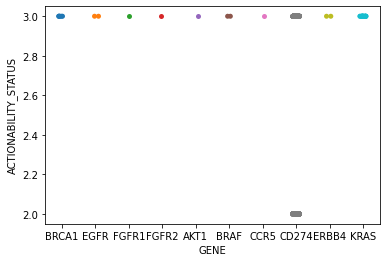

In [66]:
##2. Create a scatter plot based on the gene and mutation_remark compared to 
#the Number of Trials being studied for Mutation.2pts

#gene_count = df['GENE'].value_counts()
#gene_count_df = pd.DataFrame()
sns.stripplot(y='ACTIONABILITY_STATUS', x='GENE', data=df)
#plt.scatter(df['GENE'],df['gene_count'])
#plt.scatter(
 #   genes_with_three_or_more_transcripts[genes_with_three_or_more_transcripts['chromosome'] == 'X']['gene'],
  #  genes_with_three_or_more_transcripts[genes_with_three_or_more_transcripts['chromosome'] == 'X']['exon counts'], 
   # color='blue', 
    #label='Chr X'
#)


<AxesSubplot:xlabel='ACTIONABILITY_STATUS', ylabel='DRUG_COMBINATION'>

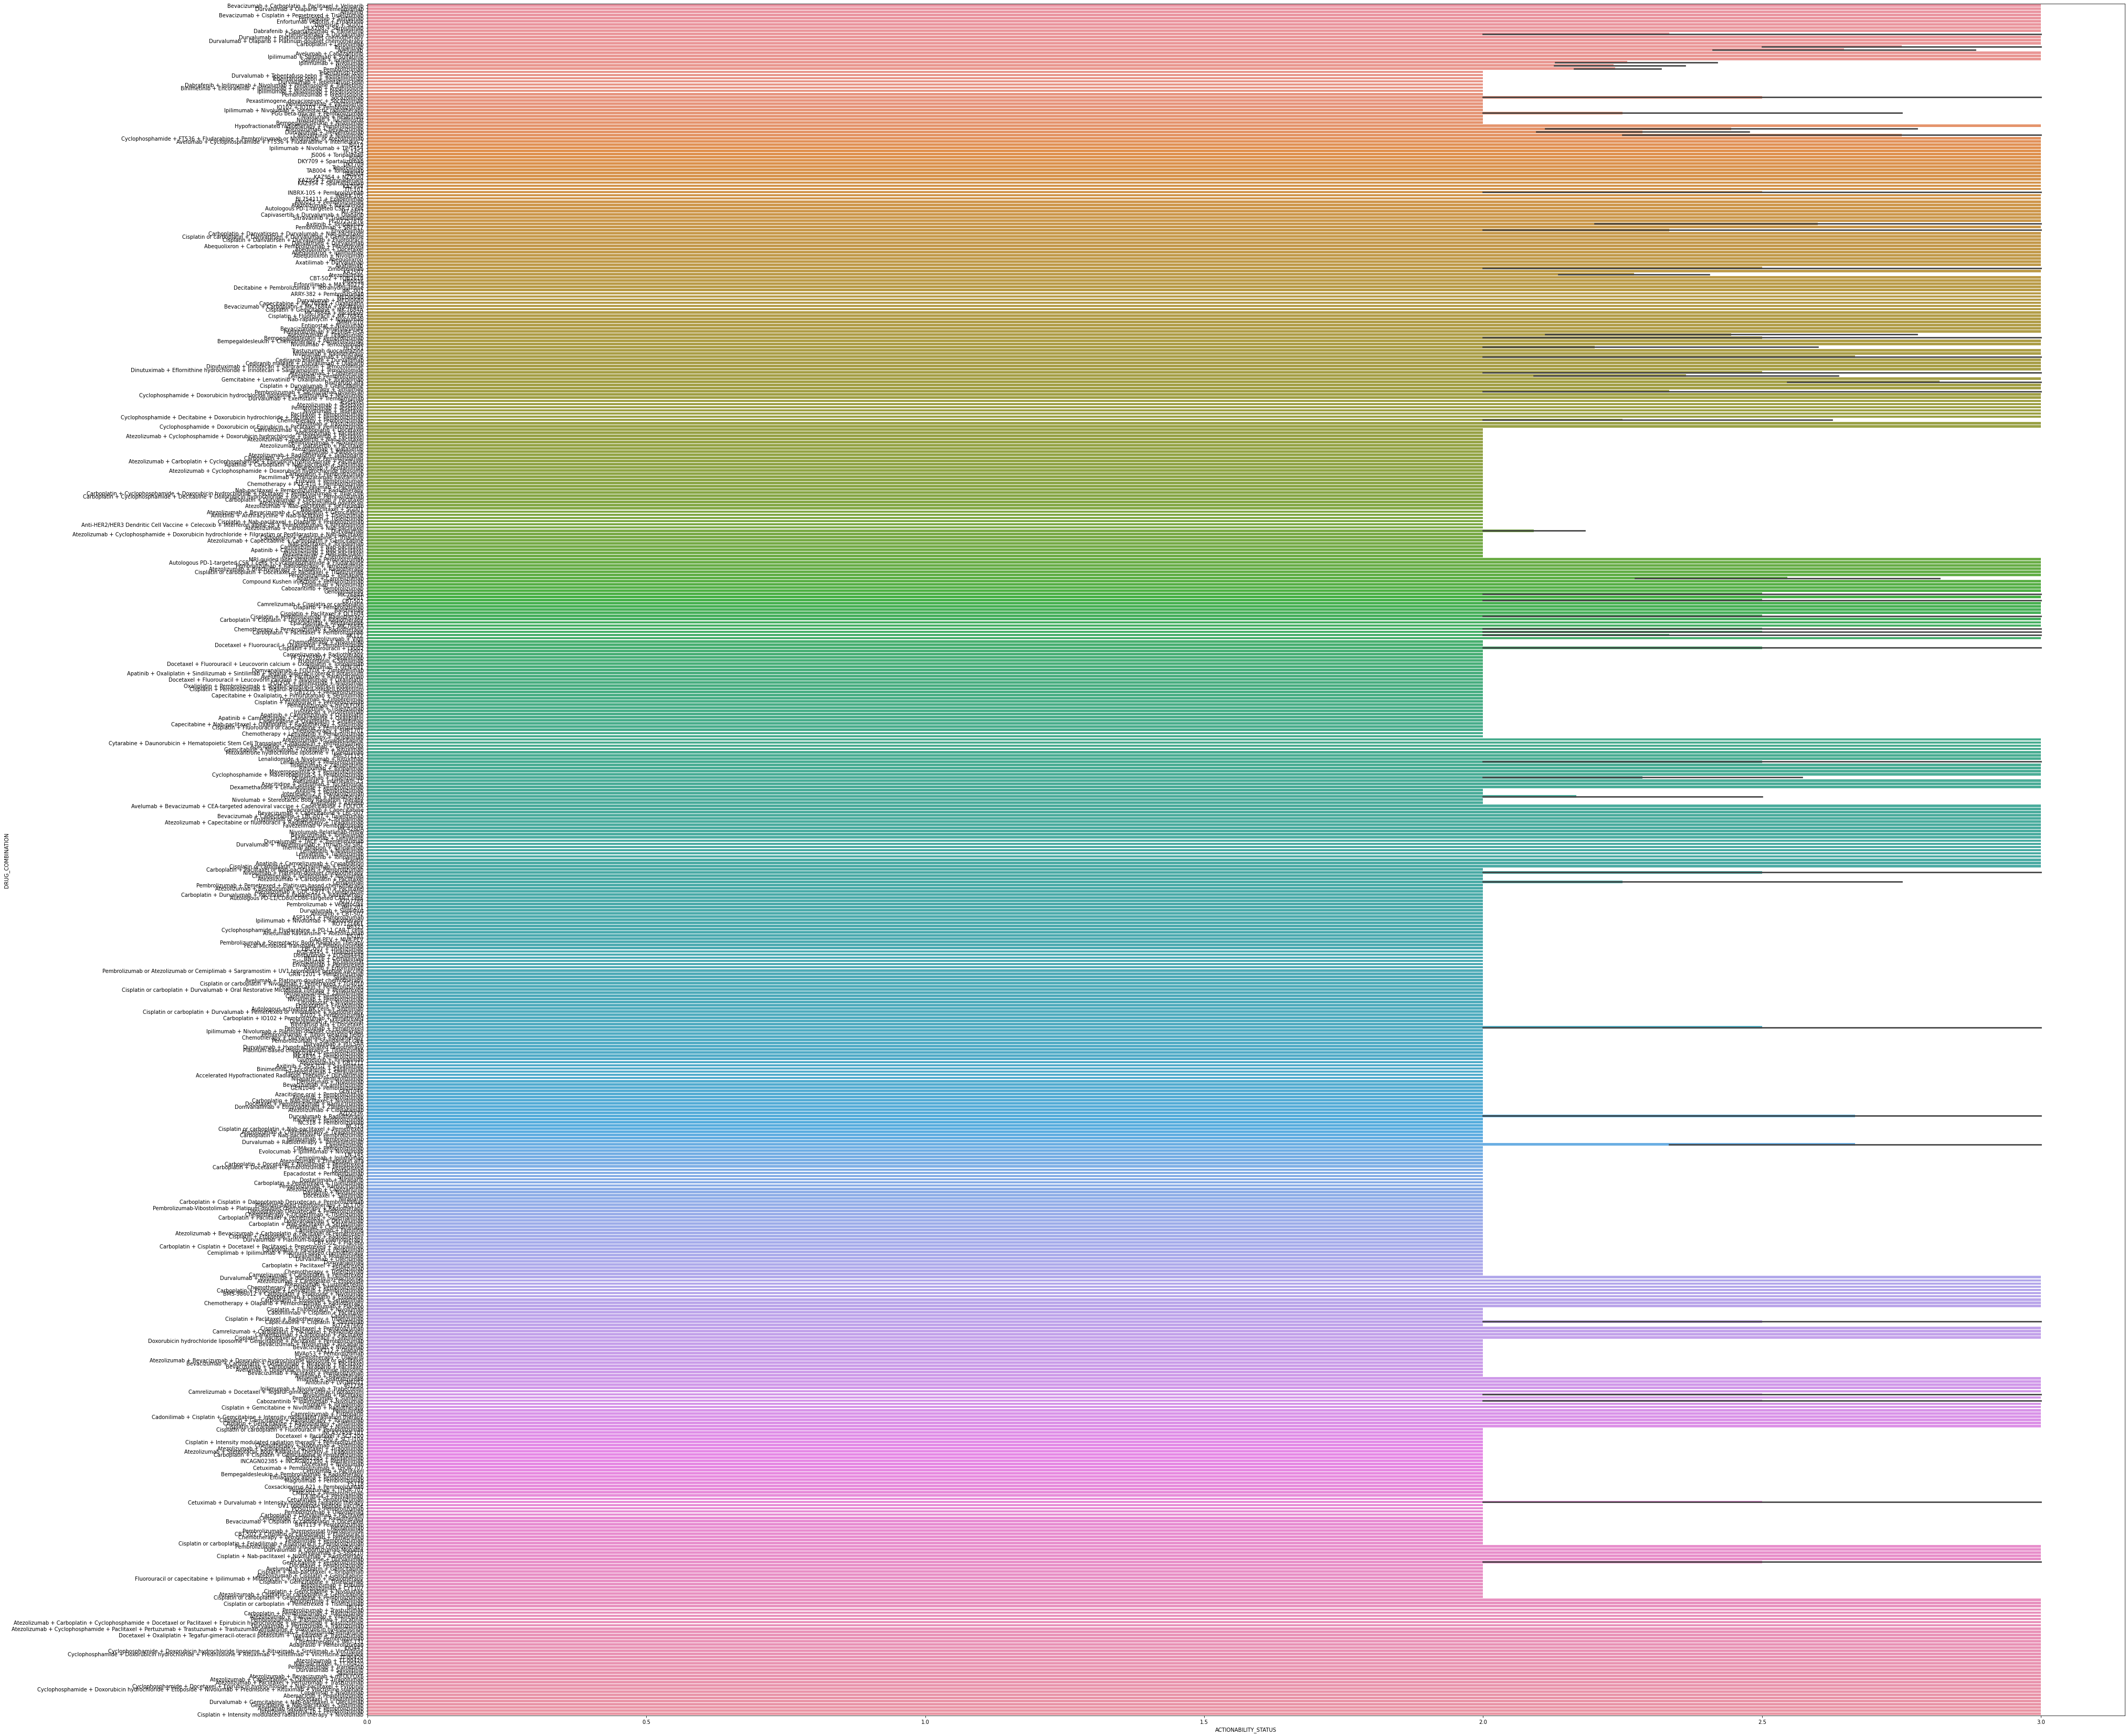

In [70]:
#3.Create a bar chart based on the actionability_rank and DRUG_COMBINATION, which is 
#the treatment.  The x-axis would be the actionability_ranks and the y-axis would 
#be the drug combinations 2pts.
plt.figure(figsize=(60,60))
sns.barplot(x="ACTIONABILITY_STATUS",y="DRUG_COMBINATION",data=df)

In [159]:
#4.Create a BioPython session. Use entrez to search the protein and pubmed databases, 
#return a max of 100 based on your search term. 1pt.Capture the IDs, then perform and then
#fetch the fasta sequences and articles  and return them to a file on your local machine. 1pt
#.Create a  histogram based on the length of the fasta sequences. 1pt. Load pubmed 
#references into a dataframe.1pt.
from Bio import Entrez
Entrez.email = "eu2063@nyu.edu"
handle = Entrez.esearch(db="protein"and "pubmed", retmax = 100,term = "CD274")
record = Entrez.read(handle)
#print(record)
print(record["IdList"])
finalprojlist_four = record["IdList"]
finalprojfour = Entrez.efetch(db ='protein'and 'pubmed', id=finalprojlist_four,rettype='fasta',retmode='text')
file =  "/Users/elenauttaro/Desktop/bioinformatics/finalproject/finalprojectfour.txt"
file_out = open(file,'w')
file_out.write(finalprojfour.read())
file_out.close()

#hist
df = pd.DataFrame(finalprojfour)
df
#counts = df[df].value_counts()
#plt.hist(counts, bins=range(1))
#counts = df[]
df.hist()
#fpf = pd.read_table(io.StringIO(finalprojfour))

#fpf = pd.read_csv("/Users/elenauttaro/Desktop/bioinformatics/finalproject/finalprojectfour.txt",delimiter = '\t')
#plt.hist(fpf['length'],bins=range(0,int(max(fpf['length']))+ 100,100),edgecolor='blue')


['38115636', '38090581', '38088487', '38076335', '38071230', '38065859', '38062971', '38058821', '38057698', '38053375', '38051328', '38050808', '38050283', '38046156', '38040421', '38040417', '38038129', '38035081', '38032149', '38030304', '38030173', '38029851', '38029830', '38029539', '38011968', '38007240', '38006800', '38001512', '37993664', '37993085', '37992688', '37986370', '37985999', '37984507', '37977513', '37976136', '37968047', '29999970', '37961947', '37960731', '37958292', '37955534', '37951196', '37949863', '37949473', '37945587', '37944524', '37943164', '37939515', '37923412', '37924094', '37919059', '37914384', '37910602', '37908728', '37906592', '37905619', '37905457', '37904707', '37903590', '37898851', '37898619', '37894913', '37894765', '37890815', '37880233', '37872955', '37868689', '37856765', '37854154', '37854019', '37848996', '37845563', '37843335', '37836835', '37833206', '37828560', '37828105', '37822924', '37821882', '37819165', '37817770', '37817263', '37

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [101]:
#5.Create a Bioservices KEGG session. Use the find method and pass in 
#the parameters 'disease' and your search term.  Capture the output based on 
#the ID, ex. 'H01692'. Write the output to a file. 1pt. Obtain the 'hsa' number, 
#ex. 'hsa04150', and create the pathway map,1pt. Obtain the network annotation and 
#write that a file,1pt.
from bioservices import *
k = KEGG(verbose=False)
k.dbinfo('disease')
print(k.find('disease','melanoma'))
print(k.get('H00038'))
melanoma_file = k.get('H00038')
file = "/Users/elenauttaro/Desktop/bioinformatics/melanoma_file.txt"
file_out = open(file,'w')
file_out.write=(melanoma_file)
file_out.close()
print(k.find('genes','CD274'))
print(k.find("pathway","melanoma"))


ds:H00038	Melanoma

ENTRY       H00038                      Disease
NAME        Melanoma
  SUBGROUP  Cutaneous malignant melanoma (CMM)
  SUPERGRP  Solid tumor [DS:H02421]
DESCRIPTION Melanoma is a form of skin cancer that has a poor prognosis and which is on the rise in Western populations. Melanoma arises from the malignant transformation of pigment-producing cells, melanocytes. The only known environmental risk factor is exposure to ultraviolet (UV) light and in people with fair skin the risk is greatly increased. Melanoma pathogenesis is also driven by genetic factors. Oncogenic NRAS mutations activate both effector pathways Raf-MEK-ERK and PI3K-Akt. The Raf-MEK-ERK pathway may also be activated via mutations in the BRAF gene. The PI3K-Akt pathway may be activated through loss or mutation of the inhibitory tumor suppressor gene PTEN. These mutations arise early during melanoma pathogenesis and are preserved throughout tumor progression. Melanoma development has been shown to be str

hsa:29126	CD274, B7-H, B7H1, PD-L1, PDCD1L1, PDCD1LG1, PDL1, hPD-L1; CD274 molecule
ptr:464981	CD274; programmed cell death 1 ligand 1 isoform X2
pps:100984141	CD274; programmed cell death 1 ligand 1 isoform X1
ggo:101153873	CD274; programmed cell death 1 ligand 1 isoform X1
pon:100443891	CD274; programmed cell death 1 ligand 1
nle:100593818	CD274; programmed cell death 1 ligand 1 isoform X1
hmh:116458777	CD274; programmed cell death 1 ligand 1
mcc:716043	CD274; programmed cell death 1 ligand 1 precursor
mcf:102145573	CD274; programmed cell death 1 ligand 1 isoform X3
mni:105491854	CD274; programmed cell death 1 ligand 1
csab:103219482	CD274; CD274 molecule
caty:105584085	CD274; programmed cell death 1 ligand 1
panu:100126721	CD274; programmed cell death 1 ligand 1 precursor
tge:112607850	CD274; programmed cell death 1 ligand 1 isoform X1
mleu:105545446	CD274; programmed cell death 1 ligand 1 isoform X1
rro:104663753	CD274; programmed cell death 1 ligand 1
rbb:108533064	CD274; programm

path:map05218	Melanoma



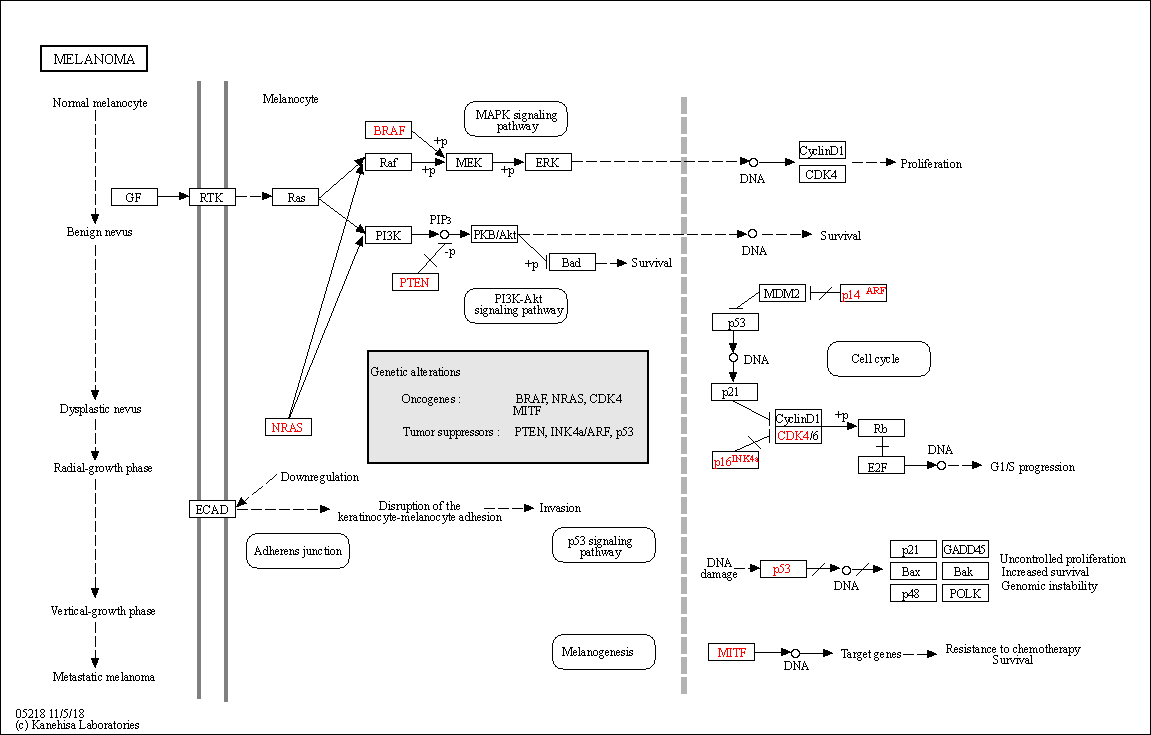

In [102]:
res =  k.get("map05218","image")
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from Bio.Graphics.ColorSpiral import ColorSpiral

from IPython.display import Image, HTML

Image(kegg_get("map05218", "image").read())

In [106]:
mela = (kegg_get("hsa05218", "kgml").read())
pathway = KGML_parser.read(kegg_get("hsa05218","kgml"))
canvas = KGMLCanvas(pathway)
canvas.draw("hsa05218.pdf")
print(pathway)
canvas.import_imagemap=True
canvas.draw("melanoma_cancermap.pdf")

Pathway: Melanoma
KEGG ID: path:hsa05218
Image file: https://www.kegg.jp/kegg/pathway/hsa/hsa05218.png
Organism: hsa
Entries: 41
Entry types:
	gene: 32
	group: 1
	compound: 1
	map: 7



In [111]:
#6.Create Bioservices UniProt object that uses the search method to perform a query.Ex. 
#result = u.search("protein_name:human NameOfProtein protein AND organism_name:human, go(biological process)", frmt="tsv"),1pt.
#Create a dataframe for it within your notebook,1pt.
from bioservices import UniProt
u = UniProt(verbose=False)
#result = u.search("protein_name:human NameOfProtein protein AND organism_name:human, go(biological process)", frmt="tsv")
result = u.search("human CD274 protein", frmt="tsv")
print(result)
file = "/Users/elenauttaro/Desktop/CD274_uniprot.txt"
file_out = open(file,"w")
file_out.write(result)
file_out.close()
df = pd.read_table(io.StringIO(result))
df


Entry	Entry Name	Reviewed	Protein names	Gene Names	Organism	Length
P40763	STAT3_HUMAN	reviewed	Signal transducer and activator of transcription 3 (Acute-phase response factor)	STAT3 APRF	Homo sapiens (Human)	770
Q9NZQ7	PD1L1_HUMAN	reviewed	Programmed cell death 1 ligand 1 (PD-L1) (PDCD1 ligand 1) (Programmed death ligand 1) (hPD-L1) (B7 homolog 1) (B7-H1) (CD antigen CD274)	CD274 B7H1 PDCD1L1 PDCD1LG1 PDL1	Homo sapiens (Human)	290
Q9NX76	CKLF6_HUMAN	reviewed	CKLF-like MARVEL transmembrane domain-containing protein 6 (Chemokine-like factor superfamily member 6)	CMTM6 CKLFSF6	Homo sapiens (Human)	183
Q15116	PDCD1_HUMAN	reviewed	Programmed cell death protein 1 (Protein PD-1) (hPD-1) (CD antigen CD279)	PDCD1 PD1	Homo sapiens (Human)	288
P14618	KPYM_HUMAN	reviewed	Pyruvate kinase PKM (EC 2.7.1.40) (Cytosolic thyroid hormone-binding protein) (CTHBP) (Opa-interacting protein 3) (OIP-3) (Pyruvate kinase 2/3) (Pyruvate kinase muscle isozyme) (Threonine-protein kinase PKM2) (EC 2.7.11.1) (Thyroi

,Entry,Entry Name,Reviewed,Protein names,Gene Names,Organism,Length
0,P40763,STAT3_HUMAN,reviewed,Signal transducer and activator of transcripti...,STAT3 APRF,Homo sapiens (Human),770
1,Q9NZQ7,PD1L1_HUMAN,reviewed,Programmed cell death 1 ligand 1 (PD-L1) (PDCD...,CD274 B7H1 PDCD1L1 PDCD1LG1 PDL1,Homo sapiens (Human),290
2,Q9NX76,CKLF6_HUMAN,reviewed,CKLF-like MARVEL transmembrane domain-containi...,CMTM6 CKLFSF6,Homo sapiens (Human),183
3,Q15116,PDCD1_HUMAN,reviewed,Programmed cell death protein 1 (Protein PD-1)...,PDCD1 PD1,Homo sapiens (Human),288
4,P14618,KPYM_HUMAN,reviewed,Pyruvate kinase PKM (EC 2.7.1.40) (Cytosolic t...,PKM OIP3 PK2 PK3 PKM2,Homo sapiens (Human),531
5,P33681,CD80_HUMAN,reviewed,T-lymphocyte activation antigen CD80 (Activati...,CD80 CD28LG CD28LG1 LAB7,Homo sapiens (Human),288
6,Q8IZR5,CKLF4_HUMAN,reviewed,CKLF-like MARVEL transmembrane domain-containi...,CMTM4 CKLFSF4,Homo sapiens (Human),234
7,Q9UNE7,CHIP_HUMAN,reviewed,E3 ubiquitin-protein ligase CHIP (EC 2.3.2.27)...,STUB1 CHIP PP1131,Homo sapiens (Human),303
8,Q9BYG8,GSDMC_HUMAN,reviewed,Gasdermin-C (Melanoma-derived leucine zipper-c...,GSDMC MLZE,Homo sapiens (Human),508
9,O00327,BMAL1_HUMAN,reviewed,Basic helix-loop-helix ARNT-like protein 1 (Ar...,BMAL1 ARNTL BHLHE5 MOP3 PASD3,Homo sapiens (Human),626


In [136]:
#7.Create a Bioservices UniProt object that does the following: 
#result = u.search("family:'Protein Name'AND comment(DISEASE)", frmt="tsv"),1pt. 
#Create a dataframe from the result,1pt.
from bioservices import UniProt
u = UniProt(verbose=False)
result = u.search("family:programmed cell death 1 ligand 1 AND comment(DISEASE)", frmt="tsv")
print(result)
file = "/Users/elenauttaro/Desktop/CD274_uniprot2.txt"
file_out = open(file,"w")
file_out.write(result)
file_out.close()
df = pd.read_table(io.StringIO(result))
df
#output has no info

Entry	Entry Name	Reviewed	Protein names	Gene Names	Organism	Length


,Entry,Entry Name,Reviewed,Protein names,Gene Names,Organism,Length


In [160]:
#8.Create a function that defines an object, via bioservices or biopython, that will run a
#query and return a file of fasta sequences using the search term assigned to you . 
#All sequences must be human, 3pts.
def fasta_CD274(CD274, final_CD274):
    handle = Entrez.esearch(db="disease", term = "human CD274 protein")
    record = Entrez.read(handle)
    handle.close()
    id_list = record["IdList"]
    if id_list:
        handle = Entrez.efetch(db="disease", id = id_list,rettype = "fasta",retmode = "text")
        object = handle.read()
        
        file =  "/Users/elenauttaro/Desktop/bioinformatics/finalproject/final_CD274.txt"
        file_out = open(final_CD274,'w')
        file_out.write(final_CD274.read())
        file_out.close()
        
print(fasta_CD274)

<function fasta_CD274 at 0x7ff2b2791160>


In [150]:
#9.Perform a BioPython Search using the term 'Gefitinib', 1pt. 
Entrez.email = "eu2063@nyu.edu"
handle = Entrez.esearch(db ="pubmed", retmax = 25, term="gefitinib")
record = Entrez.read(handle)
print(record["IdList"])
gefitinib_list= record["IdList"]
gefitinib = Entrez.efetch(db ='pubmed', id =gefitinib_list, retmode = 'text')
file = "/Users/elenauttaro/Desktop/bioinformatics/finalproject/gefitinib.fa"
file_out = open(file,'w')
file_out.write(gefitinib.read())
file_out.close()

['38112449', '38107172', '38101609', '38100532', '38097606', '38092263', '38090376', '38085693', '38075671', '38046236', '38035001', '38033496', '38032449', '38021444', '38021095', '38018431', '38016250', '38012958', '38010260', '38009559', '38007893', '38006449', '38004415', '38001824', '38000720']


In [154]:
#10.Parse the actionability file based on the condition that
#Approved FDA and lung / carcinoma / non small cell carcinoma are 
#in the same line. If so, then create a new dataframe that consist of
#the gene, DISEASE,DRUG_COMBINATION,   MUTATION_REMARK, and
#PRIMARY_OUTCOME_MEASURE. 1pt. Get Pathway map, 1pt. 
with open("/Users/elenauttaro/Desktop/bioinformatics/finalproject/ActionabilityData.txt") as data10:
    out = open('/Users/elenauttaro/Desktop/bioinformatics/finalproject/finalproj10.txt', 'w')
    out.write('GENE' + '\t' + 'MUTATION_REMARK' + '\t' + 'DISEASE' + '\t'+'DRUG_COMBINATION'+
              '\t' + 'PRIMARY_OUTCOME_MEASURE' +'\n')
    for line in data10:
        if 'Approved FDA and lung / carcinoma / non small cell carcinoma ' in line:
            line_list = line.split('\t')
            out.write(line_list[0] + '\t' + line_list[1] + '\t' + line_list[5] + '\t'+line_list[8]+'\t'+line_list[22]+'\n')      
    out.close()
print(data)
df = pd.read_csv('/Users/elenauttaro/Desktop/bioinformatics/finalproject/finalproj10.txt', delimiter='\t')
df

print(k.find("pathway","lung"))
#pathway: map05223


<_io.TextIOWrapper name='/Users/elenauttaro/Desktop/bioinformatics/finalproject/ActionabilityData.txt' mode='r' encoding='UTF-8'>
path:map05222	Small cell lung cancer
path:map05223	Non-small cell lung cancer



11 and 12). Summarize.After downloading the necessary packages I began my analysis. For the first question  I parsed the actionability file to only include data with my search term CD274. I also parsed the file so that only mutation_mark, gene, disease, actionability_status, drug_combination, development_status and primary_outcome_measure are included in the parsed file. The parsed file was saved as finalproj.txt and saved as a dataframe. For the second question, I create a scatter plot that plotted each gene associated with CD274 to the number of trials the gene was studied for mutation. Most genes were trialed 3x and only CD274 was trialed 2 or 3 times. In question 3 I created a bar chart represented actionability status vs the drug combination from the parsed file (the first data frame). There were many drug combinations so it is a little hard to see each one however, I tried to fix the size of the bar chart where the axes and trends were most visible. In number four I created a biopython session using entrez searching for my term “CD274” from the databases protein and pubmed. I was able to get results however, the dataframe I created to hold the results of the findings did not show the results correctly and neither did the histogram. This could be because my results only were one column and the error messages read that I needed two columns for a histogram and dataframe. In question 5, I created a KEGG session to search for the pathway map of my search term CD274. Based on the parsed file in question 1, CD274 is associated with the disease melanoma. Therefore, when I searched for the pathway of a specific disease, I searched for melanoma. The map is shown in the output for question 5. The map was then saved as a pdf. For question 6, I created a Uniprot object that searched for the human CD274 protein. The first search “#result = u.search("protein_name:human CD274 protein AND organism_name:human, go(biological process)", frmt="tsv")” did not have any results but the second search I tried “result = u.search("human CD274 protein", frmt="tsv")” gave results of the information for CD274. This search was saved as a dataframe. For question 7, I did a Uniprot search again but searching for the family of CD274. I searched: “result = u.search("family:programmed cell death 1 ligand 1 AND comment(DISEASE)", frmt="tsv")” since CD274 is in the family programmed cell death 1 ligand 1 based on the parsed actionability file from question 1. This search gave me no output. For question 8, I did a biopython search for human CD274 protein within a function. Running this function gave me the output for the biopython search on an output file. For number 9, I did a Biopython search using Gefitinib using the database pubmed. The results gave IDs of Gefitinib. For number 10, I first parsed the Actionability file to make sure only data for gene, mutation_remark, disease, drug_combination and primary_outcome_measure is included. I then parsed the file so that only data that included Approved FDA and lung/ carcinoma/non small cell carcinoma and saved it to a dataframe. The dataframe showed none of the data included Approved FDA and lung/carcinoma/non small cell carcinoma. To find the map, I did a KEGG search to find the pathway for lung. The result gave me the pathway for non small cell carcinoma. 